In [14]:
# model

import tensorflow as tf
# 유명하고 자주 쓰이는 Data set 이기 때문에 example 에 포함되어 있음
from tensorflow.examples.tutorials.mnist import input_data

# 처음에 한 번 Download 하고 이 후에는 Local 에서 Read
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# image size = 28 * 28 = 784
# 0~9 digits
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Training epoch/batch
Batch size
* Data set 이 크기 때문에 한 번에 학습하는 Data 수를 지정
Epoch
* 전체 Data set 을 한 번 다 학습하는 것을 1 epoch
* 1000 개 Data set, Batch size = 500 일 경우 1 epoch = 2 iteration

In [20]:
# learning

# 15 epoch
# 100개 씩 batch
epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        cost_val, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
        avg_cost += cost_val / total_batch

    print("Epoch:", "%04d" % (epoch + 1), "Cost:", "{:.9f}".format(avg_cost))

Epoch: 0001 Cost: 2.858805711
Epoch: 0002 Cost: 1.119581282
Epoch: 0003 Cost: 0.887986902
Epoch: 0004 Cost: 0.775655711
Epoch: 0005 Cost: 0.705462080
Epoch: 0006 Cost: 0.656469833
Epoch: 0007 Cost: 0.617732678
Epoch: 0008 Cost: 0.588083029
Epoch: 0009 Cost: 0.563630768
Epoch: 0010 Cost: 0.542715972
Epoch: 0011 Cost: 0.524848262
Epoch: 0012 Cost: 0.509261930
Epoch: 0013 Cost: 0.495493346
Epoch: 0014 Cost: 0.483333752
Epoch: 0015 Cost: 0.472304623


In [16]:
# Accuracy

# sess.run(accuracy, ...) 와 동일 방법임
print("Accuracy:", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Accuracy: 0.8883


Label: [1]
Prediction: [1]


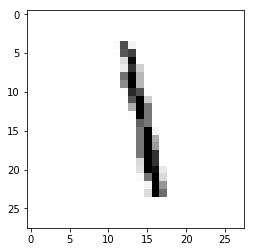

In [33]:
# Test

import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()